Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '5fe8db7afec0573c471e065d'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 164019
before = 3
after = 4

In [4]:
anom.loc[ind - 730 * before + 10 * 3 + 6:ind + 720 * after]

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
161865,2021-08-24 23:52:00,5fe8db7afec0573c471e065d,"[234.523875,244.551,235.381625]","[0.4,0.5,0.5]","[7.12875,3.96375,5.28625]","[14577.25043,14357.383965,14035.16945]","[219.61361,0.36411,0.23962]",[],[],16.37875,...,[],[],17.62,42969.80391,220.21734,\N,\N,"[-85,-87,-86.4]","[0,-120.2,119.7]",49.98
161866,2021-08-24 23:54:00,5fe8db7afec0573c471e065d,"[233.985142857143,245.128571428571,235.3267142...","[0.4,0.5,0.5]","[6.82285714285714,4.10428571428571,5.458571428...","[14577.250665,14357.384095,14035.169625]","[219.61361,0.36411,0.23962]",[],[],16.385714,...,[],[],18.05,42969.80444,220.21734,\N,\N,"[-86,-87.1,-85]","[0,-120.2,119.7]",50.0
161867,2021-08-24 23:56:00,5fe8db7afec0573c471e065d,"[234.48175,245.621375,235.007]","[0.4,0.5,0.5]","[7.06666666666667,3.64571428571429,5.22]","[14577.2509,14357.38423,14035.169805]","[219.61361,0.36411,0.23962]",[],[],15.932381,...,[],[],17.06,42969.80498,220.21734,\N,\N,"[-85.8,-86.3,-85.3]","[0,-120.1,119.8]",50.01
161868,2021-08-24 23:58:00,5fe8db7afec0573c471e065d,"[233.917125,244.83125,235.550125]","[0.4,0.5,0.5]","[6.73,4.22875,5.59875]","[14577.251135,14357.38436,14035.16998]","[219.61361,0.36411,0.23962]",[],[],16.5575,...,[],[],17.13,42969.80553,220.21734,\N,\N,"[-86,-86.9,-86.5]","[0,-120.3,119.8]",50.0
161869,2021-08-25 00:00:00,5fe8db7afec0573c471e065d,"[234.03825,244.81525,235.3315]","[0.4,0.5,0.5]","[6.82,4.09375,5.51]","[14577.251355,14357.384495,14035.170165]","[219.61361,0.36411,0.23962]",[],[],16.42375,...,[],[],17.18,42969.80607,220.21734,\N,\N,"[-86,-85.1,-86.4]","[0,-120.2,119.8]",50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166895,2021-09-01 00:25:10,5fe8db7afec0573c471e065d,"[232.937375,243.50925,233.669875]","[0.4,0.5,0.5]","[6.80375,3.8375,5.42]","[14697.019295,14489.844365,14110.07109]","[230.46028,0.36411,0.23962]",[],[],16.06125,...,[],[],16.69,43296.93481,231.06401,\N,\N,"[-86,-87.6,-87.3]","[0,-120.1,119.8]",49.99
166896,2021-09-01 00:27:10,5fe8db7afec0573c471e065d,"[232.691285714286,242.854142857143,233.6005714...","[0.4,0.5,0.5]","[6.68375,3.89125,5.42428571428572]","[14697.019515,14489.84449,14110.071265]","[230.46028,0.36411,0.23962]",[],[],15.999286,...,[],[],16.46,43296.93532,231.06401,\N,\N,"[-85.9,-87.6,-87]","[0,-120.3,119.7]",49.99
166897,2021-09-01 00:29:10,5fe8db7afec0573c471e065d,"[232.96775,243.628625,233.13425]","[0.4,0.5,0.5]","[7.08428571428571,3.73285714285714,5.258571428...","[14697.019755,14489.84462,14110.071445]","[230.46028,0.36411,0.23962]",[],[],16.075714,...,[],[],16.74,43296.93587,231.06401,\N,\N,"[-85.7,-86.4,-87]","[0,-120.1,119.8]",50.0
166898,2021-09-01 00:31:10,5fe8db7afec0573c471e065d,"[233.168857142857,243.209571428571,233.599]","[0.4,0.5,0.5]","[6.8225,3.7775,5.3975]","[14697.019985,14489.84474,14110.071625]","[230.46028,0.36411,0.23962]",[],[],15.9975,...,[],[],16.61,43296.9364,231.06401,\N,\N,"[-85.9,-86.3,-86.4]","[0,-120.2,119.6]",50.0


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

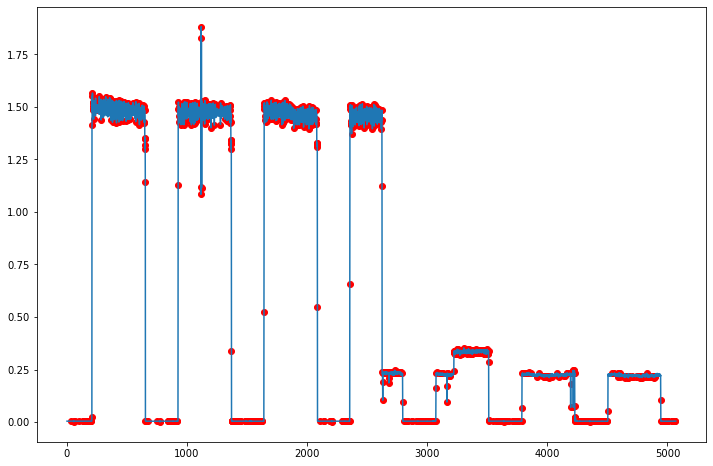

In [5]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = IsolationForest(random_state=0) 
model.fit(df)
preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


4506 4944 6


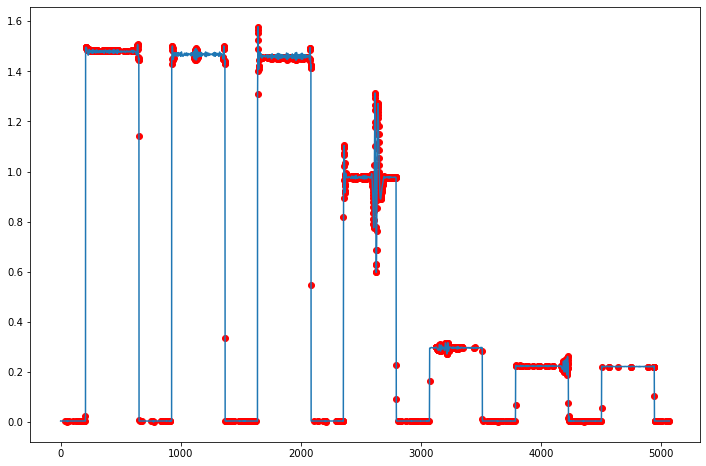

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

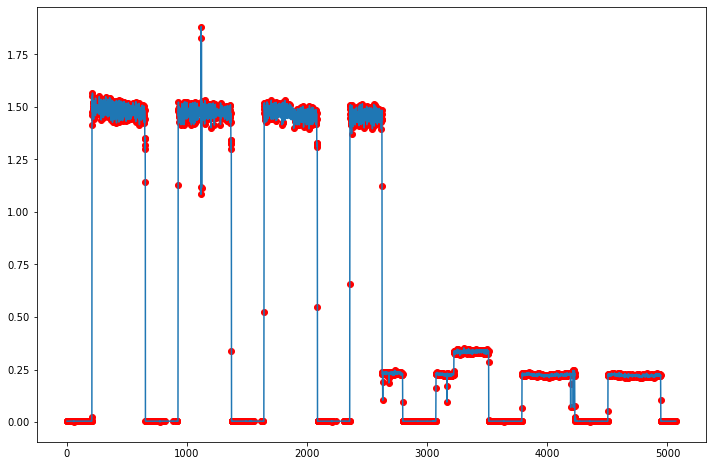

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053
4506 4944 6


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


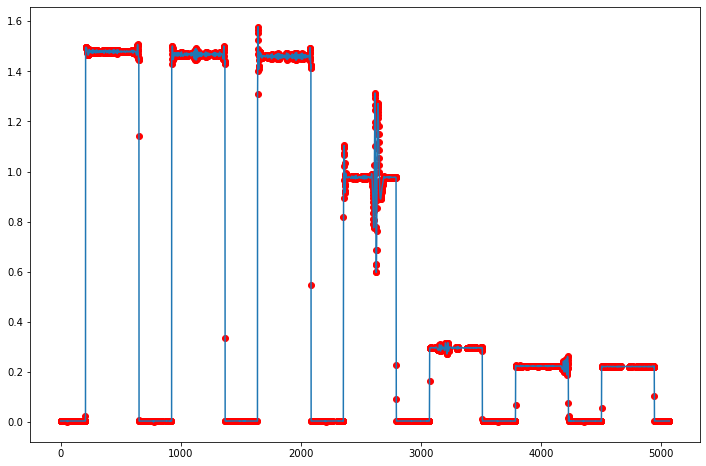

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

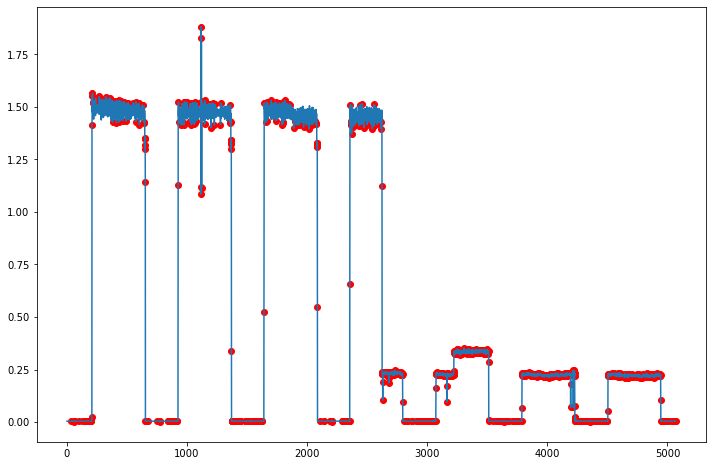

In [16]:
df = get_data(anom.loc[ind - 730 * before :ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

743
0 743
196 640 0
1459
743 1459
911 1356 1
756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053
4506 4944 6


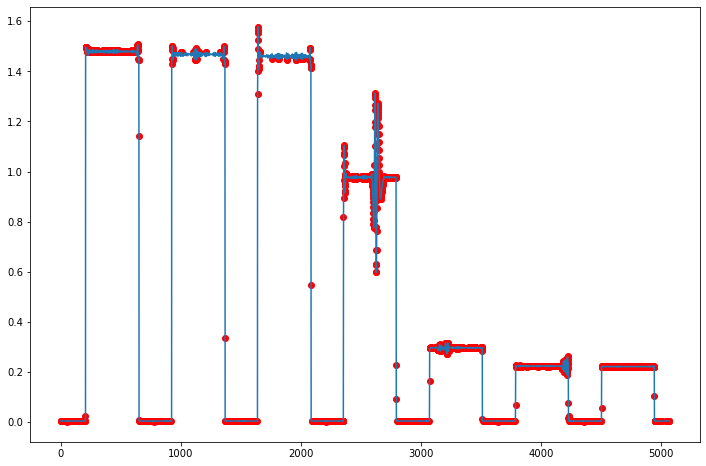

In [19]:
df = get_data(anom.loc[ind - 730 * (before - 1):ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * (before):ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, без EMD 
Трейн на норм

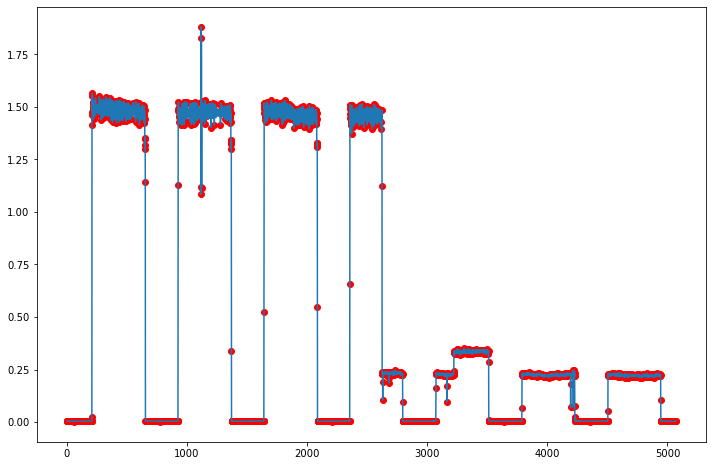

In [20]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на норм

756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2
756
0 756
209 653 0
1473
756 1473


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


926 1370 1
2189
1473 2189
1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053
4506 4944 6


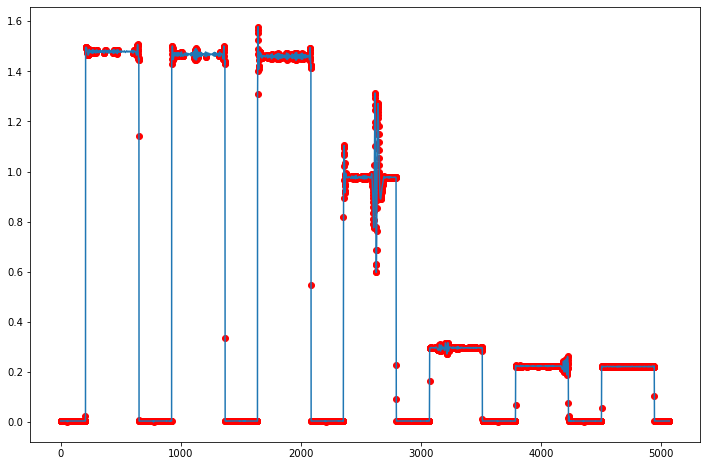

In [21]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053
4506 4944 6


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


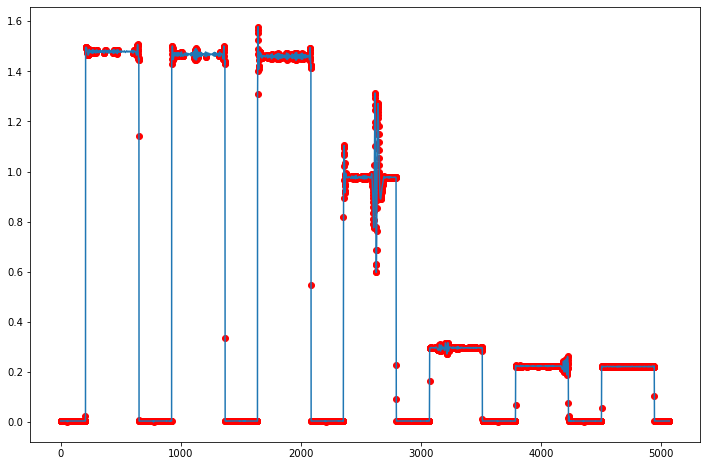

In [22]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[ 756 1473 2189 2904 3620 4337 5053]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3
3620 4337 4
4337 5053 5


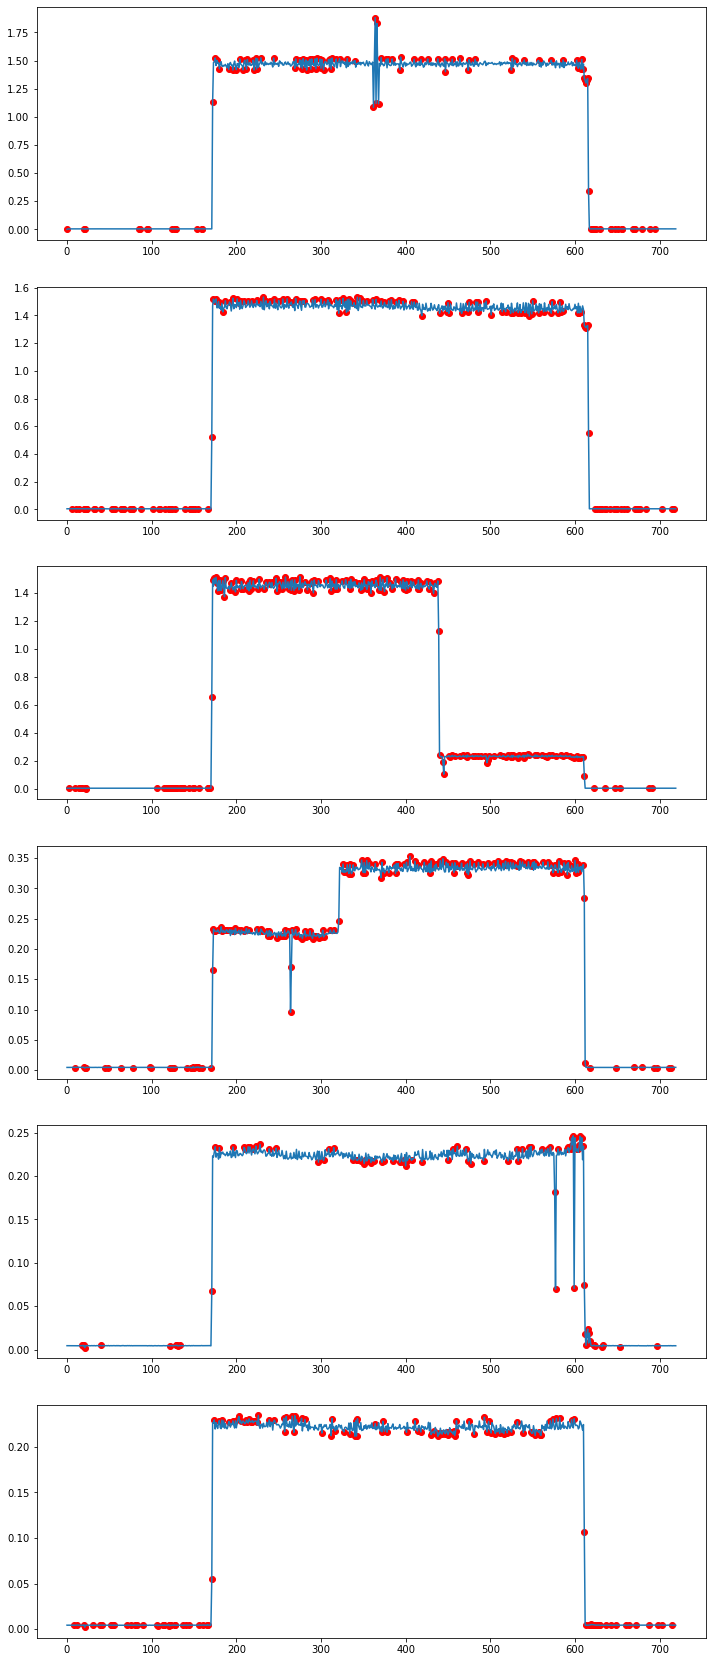

In [23]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053
4506 4944 6


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[ 756 1473 2189 2904 3620 4337 5053]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3
3620 4337 4
4337 5053 5
(6, 720)


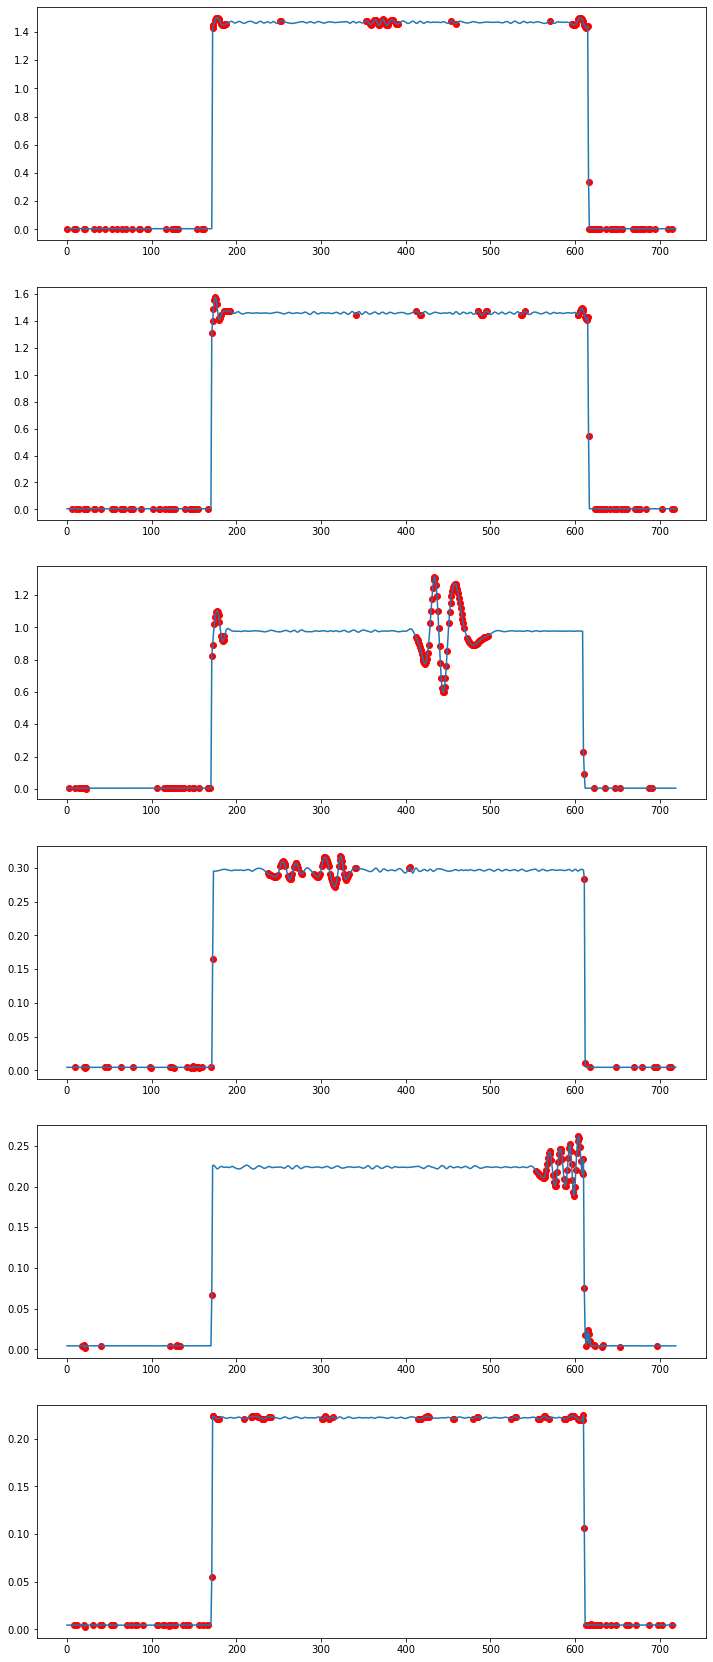

In [24]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(6, 720, 5)


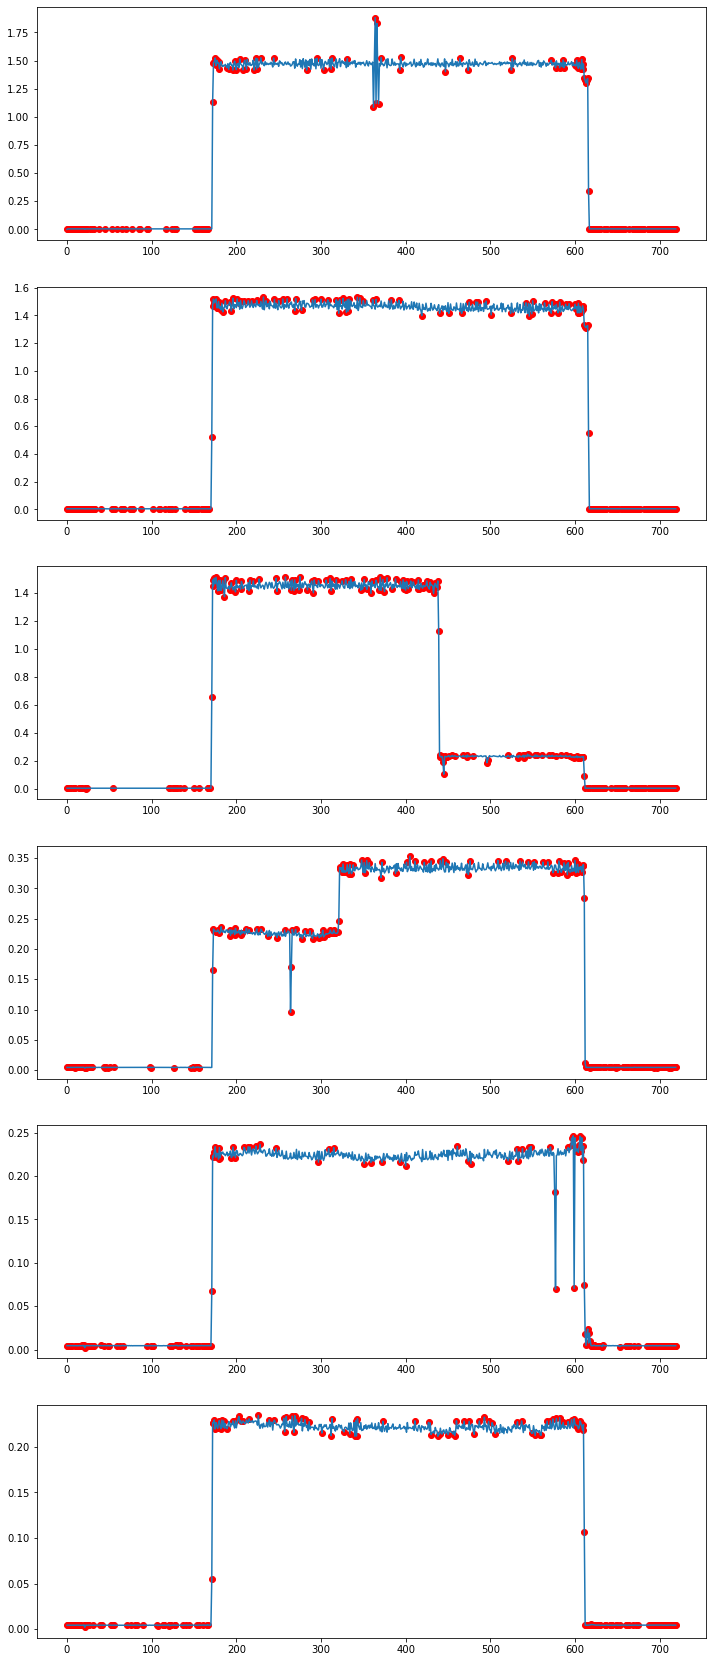

In [25]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053
4506 4944 6


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


(6, 720, 5)


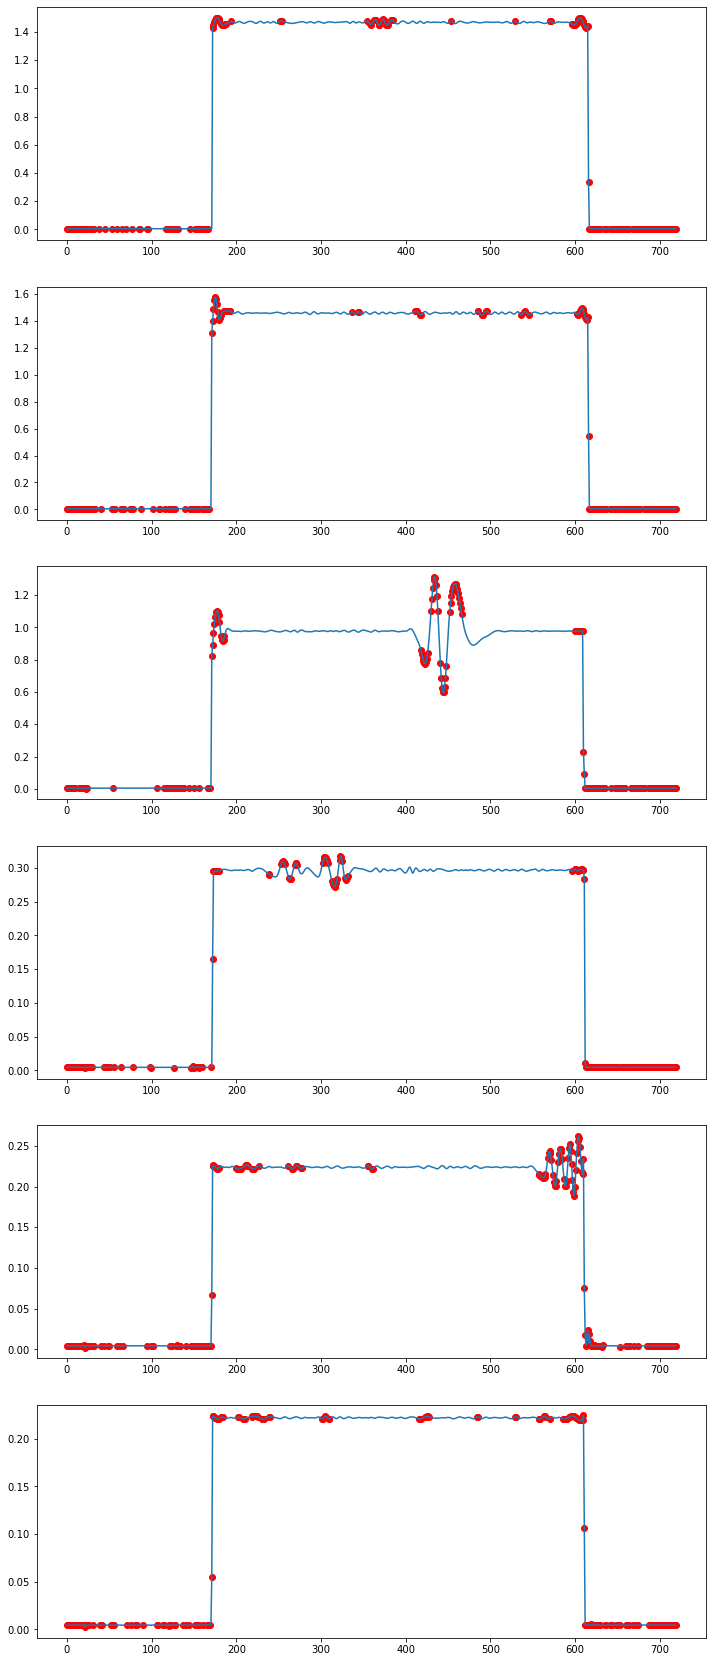

In [26]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, одна размерность, без EMD 
Трейн на норм

[ 756 1473 2189]
756 1473 0
1473 2189 1
(2, 720)
[ 756 1473 2189 2904 3620 4337 5053]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3
3620 4337 4
4337 5053 5


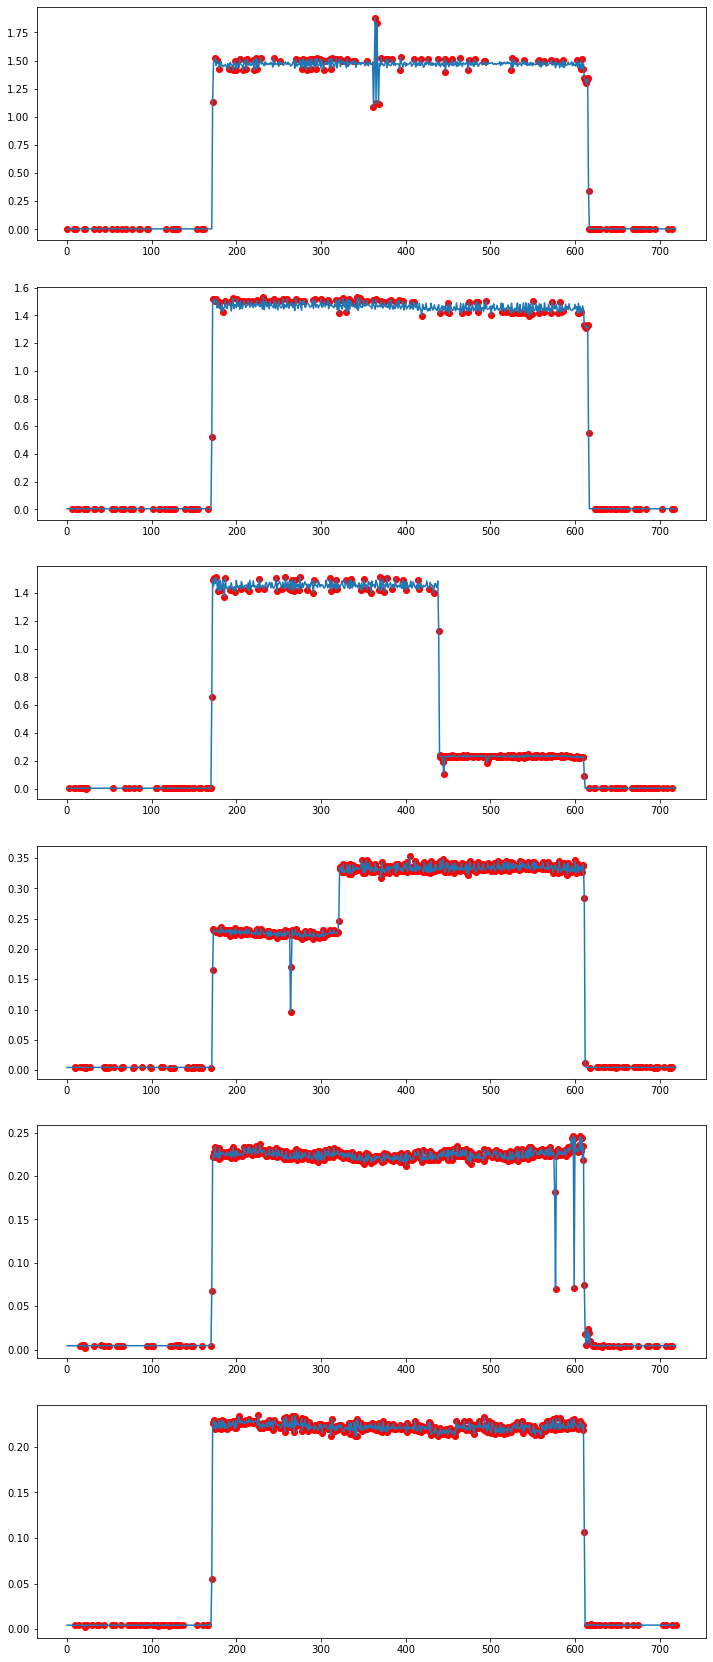

In [27]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на норм

729
0 729
191 640 0
[ 12 729]
12 729 0
(1, 720)
729
0 729
191 640 0
[ 12 729]
12 729 0


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


TypeError: 'AxesSubplot' object is not subscriptable

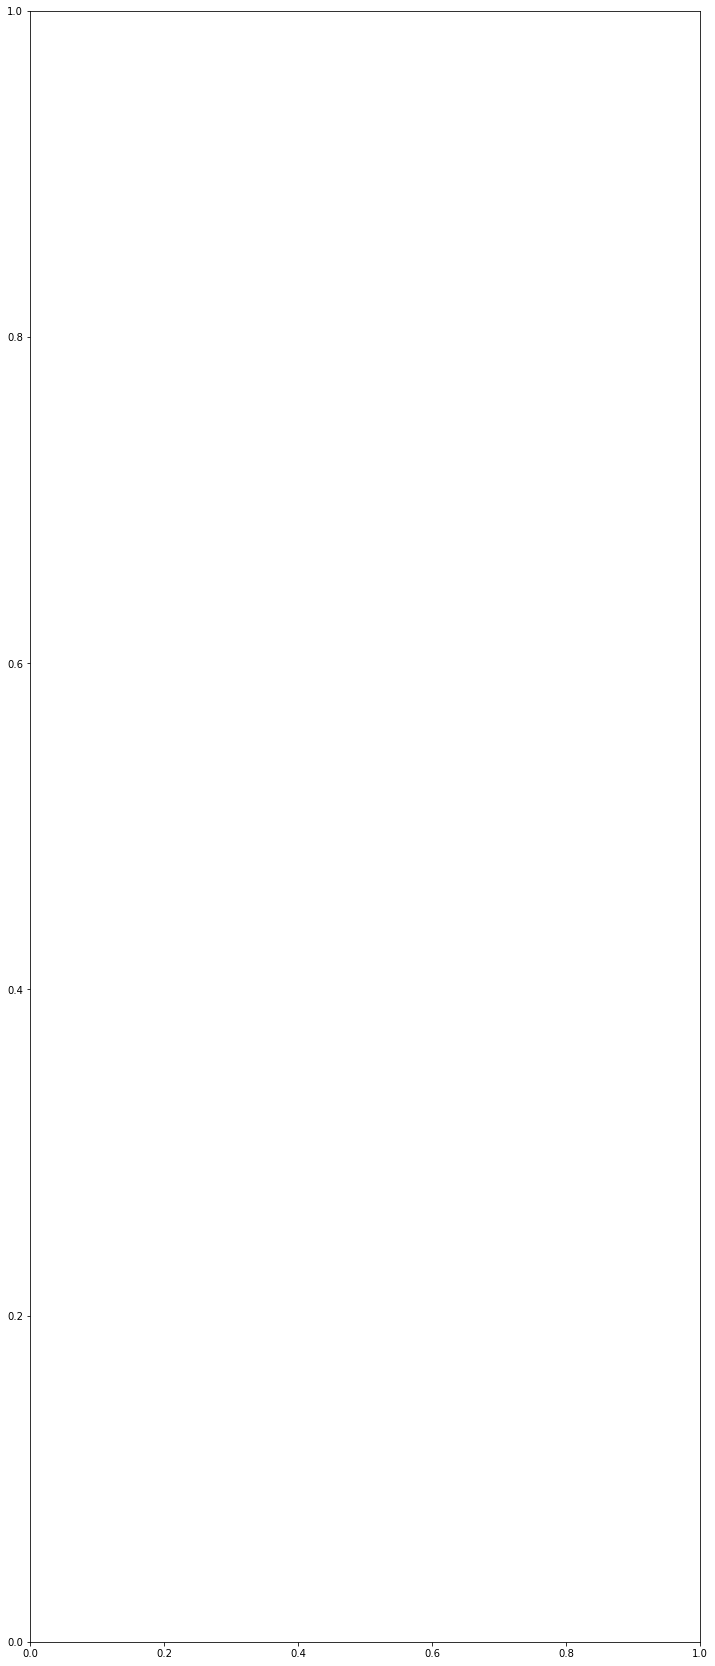

In [27]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[ 756 1473 2189 2904 3620 4337 5053]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3
3620 4337 4
4337 5053 5


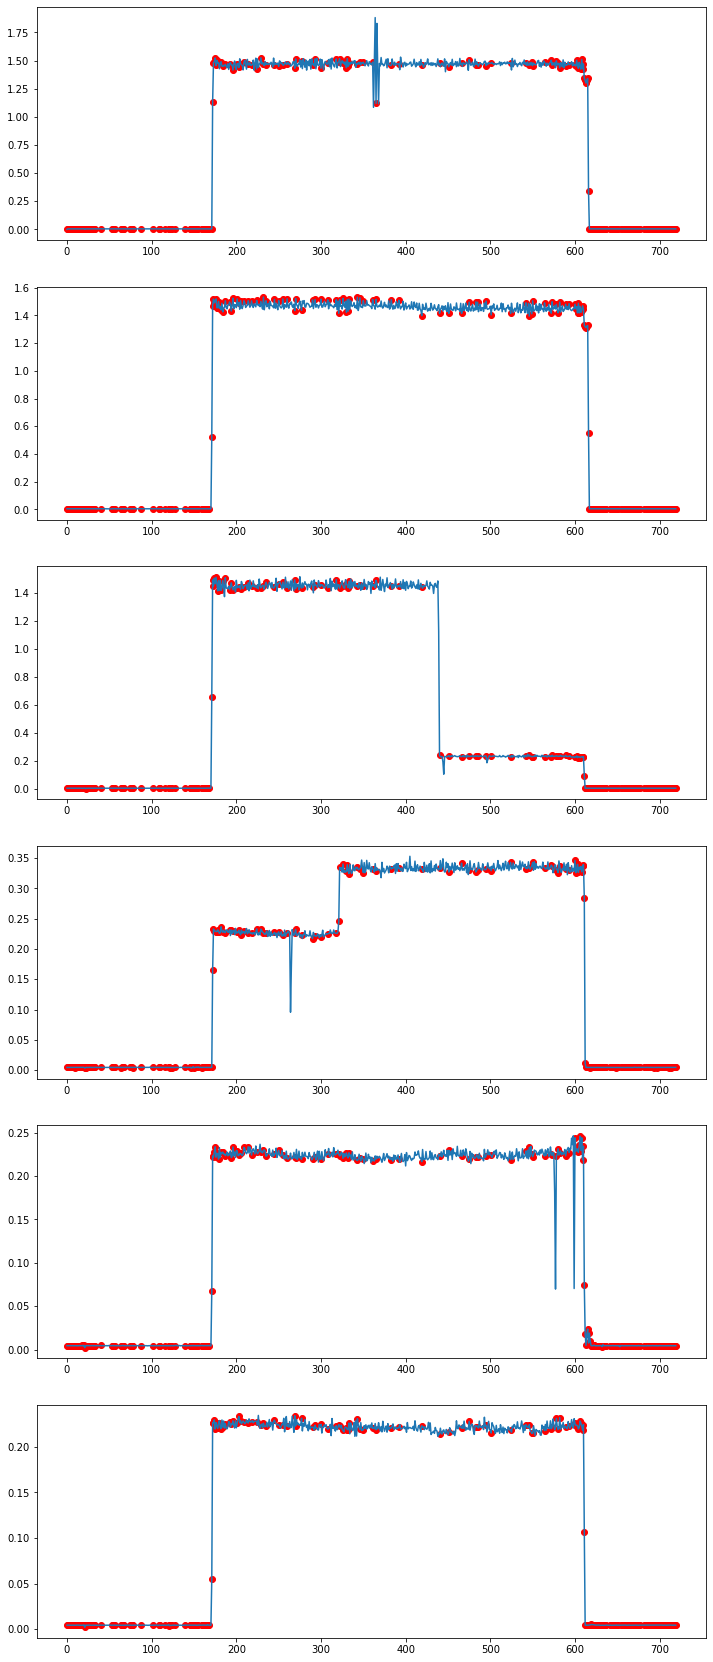

In [28]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на норм

756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


756
0 756
209 653 0
1473
756 1473
926 1370 1
2189
1473 2189
1641 2086 2
2904
2189 2904
2356 2795 3
3620
2904 3620
3074 3512 4
4337
3620 4337
3790 4228 5
5053
4337 5053
4506 4944 6
[ 756 1473 2189 2904 3620 4337 5053]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3
3620 4337 4
4337 5053 5


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


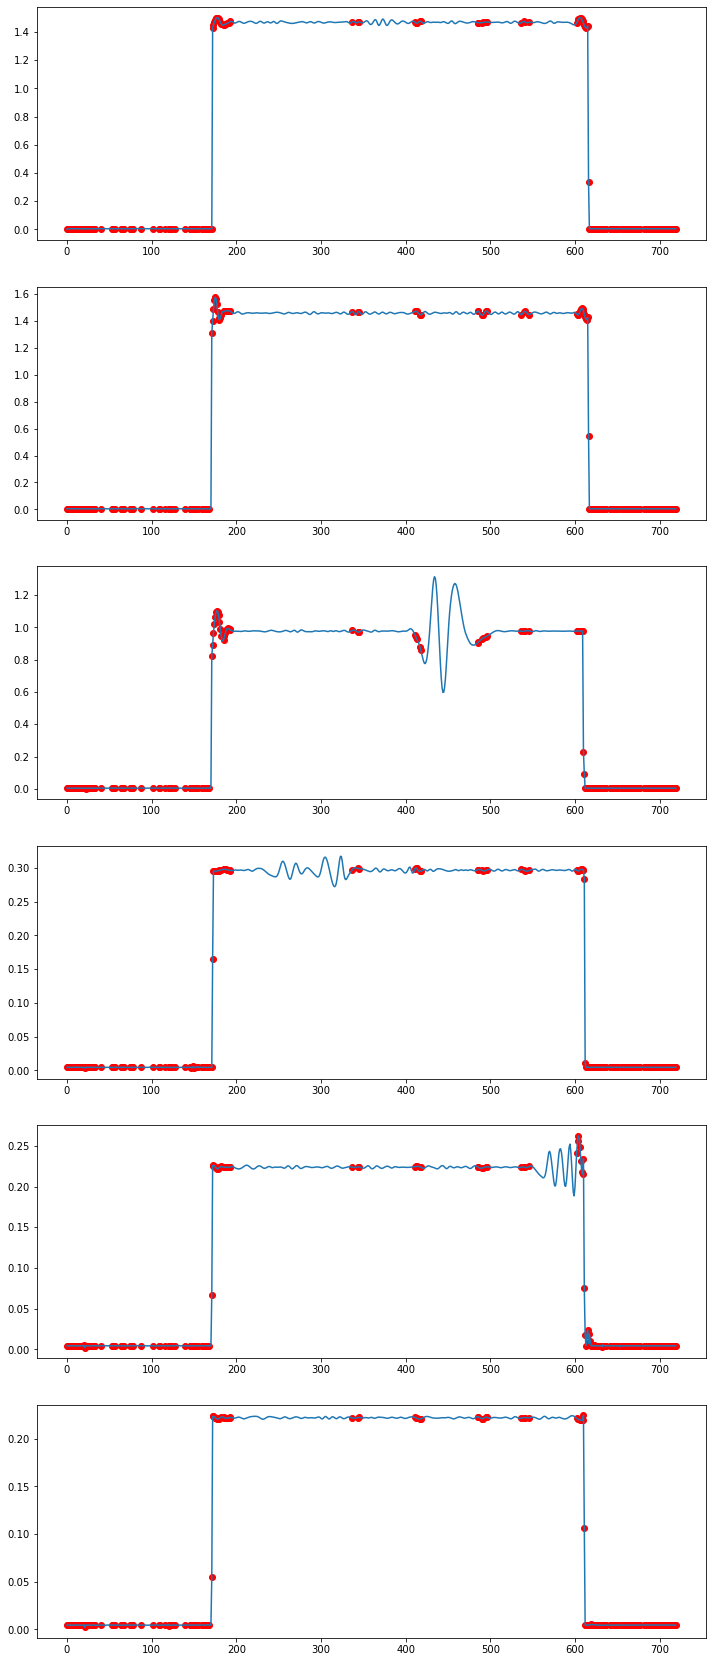

In [29]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1